In [5]:
import keras
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train_converted = keras.utils.to_categorical(y_train)
y_test_converted = keras.utils.to_categorical(y_test)

y_train_converted

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

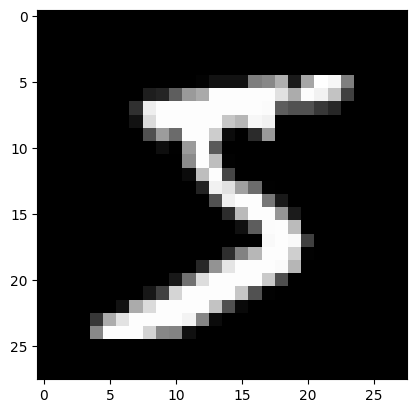

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train_remolded = x_train.reshape((60000, 784))
x_test_remolded = x_test.reshape((10000, 784))

x_train_normalized = x_train_remolded.astype("float32") / 255
x_test_normalized = x_test_remolded.astype("float32") / 255
x_train_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
model = Sequential()
model.add(keras.Input((x_train_normalized.shape[1],)))
model.add(Dense(30, kernel_initializer="normal", activation="relu"))
model.add(Dense(30, kernel_initializer="normal", activation="relu"))
model.add(Dense(10, kernel_initializer="normal", activation="softmax"))

In [13]:
from keras.optimizers import SGD

optimizer = SGD()

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
historic = model.fit(
    x_train_normalized,
    y_train_converted,
    epochs=50,
    batch_size=40,
    validation_data=(x_test_normalized, y_test_converted),
    verbose=1,
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - acc: 0.2198 - loss: 2.1525 - val_acc: 0.7438 - val_loss: 0.8732
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - acc: 0.7876 - loss: 0.7153 - val_acc: 0.8775 - val_loss: 0.4308
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - acc: 0.8835 - loss: 0.4198 - val_acc: 0.8990 - val_loss: 0.3546
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - acc: 0.8989 - loss: 0.3527 - val_acc: 0.9066 - val_loss: 0.3159
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - acc: 0.9101 - loss: 0.3203 - val_acc: 0.9163 - val_loss: 0.2889
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - acc: 0.9178 - loss: 0.2890 - val_acc: 0.9246 - val_loss: 0.2604
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - acc: 0.9239 - loss: 0.2658 - val_acc: 0.9303 - val_loss: 0.2448
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - acc: 0.9307 - loss: 0.2424 - val_acc: 0.9335 - val_loss: 0.2247
Epoch 9/50
1500/1500 ━━━

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,312 (165.29 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

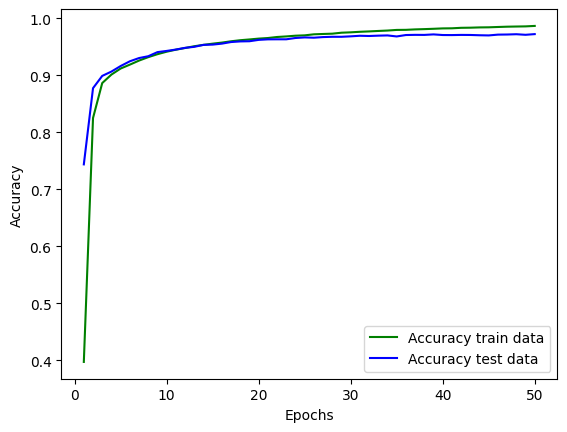

In [15]:
accuracy_train = historic.history["acc"]
accuracy_test = historic.history["val_acc"]
epochs = range(1, len(accuracy_train) + 1)

plt.plot(epochs, accuracy_train, "-g", label="Accuracy train data")
plt.plot(epochs, accuracy_test, "-b", label="Accuracy test data")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()